In [1]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Read dataset
df= pd.read_csv('D:/KDU BLENDER LEARNING/Introduction to Data Science/New datasetr/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_4250827.csv')
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN,NaN


In [3]:
#Looking at the columns
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [4]:
#Drop innecesary columns
drop_cols = ["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 66"]
df.drop(drop_cols, axis=1, inplace=True)

In [5]:
#Creating the new value Rate
inflation_df = pd.melt(df, id_vars='Country Name', var_name='Year', value_name='Rate')
print(f'Total number of countries and territories: ', inflation_df['Country Name'].nunique())
inflation_df.head()

Total number of countries and territories:  266


,Country Name,Year,Rate
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [6]:
#looking at the null values and Dtype
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  16492 non-null  object 
 1   Year          16492 non-null  object 
 2   Rate          10489 non-null  float64
dtypes: float64(1), object(2)
memory usage: 386.7+ KB


# General Plot

In [7]:
#Setting the graphs
plt.rcParams.update({'font.size': 10})
sns.set_style("darkgrid")

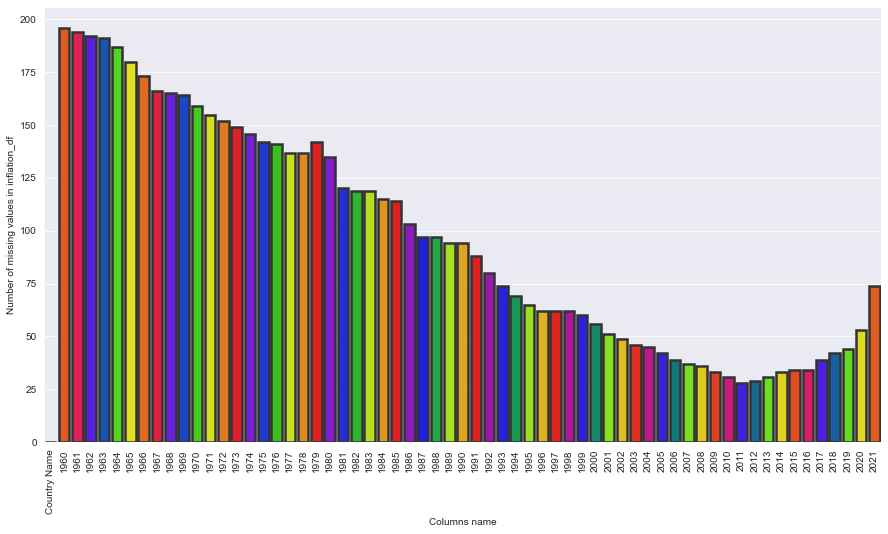

In [8]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.barplot(x=df.columns, y=df.isna().sum(),linewidth=2.5, edgecolor=".2",palette='prism_r')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in inflation_df")
plt.show()

# Inflation Analysis

We will now begin to analysis analyze the evolution of the Inflation and some characteristics in some relevant years.

In [9]:
#The Dataframe
g20 = df.loc[df['Country Name'].isin(["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy", "Japan", "Mexico", "Russian Federation","South Africa", "Saudi Arabia", "Korea, Rep.", "Turkiye", "United Kingdom", "United States"])].copy()
g20

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Australia,3.728814,2.287582,-0.319489,0.641026,2.866242,3.405573,3.293413,3.478261,2.521008,...,1.762780,2.449889,2.487923,1.508367,1.276991,1.948647,1.911401,1.610768,0.846906,2.863910
29,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.403499,6.204311,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660
35,Canada,1.358696,1.018767,1.061571,1.628151,1.912145,2.332657,3.815659,3.579952,4.055300,...,1.515678,0.938292,1.906636,1.125241,1.428760,1.596884,2.268226,1.949269,0.717000,3.395193
40,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.619524,2.621050,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015
55,Germany,1.536612,2.293676,2.843280,2.966961,2.335728,3.242329,3.533059,1.796046,1.470304,...,2.008491,1.504721,0.906798,0.514421,0.491749,1.509497,1.732168,1.445667,0.506690,3.142970
77,France,4.139936,2.400461,5.331280,4.999153,3.211192,2.703105,2.602001,2.791777,4.543205,...,1.954195,0.863715,0.507759,0.037514,0.183335,1.032283,1.850815,1.108255,0.476499,1.642331
81,United Kingdom,1.003576,3.447496,4.196499,2.018544,3.281587,4.773775,3.909618,2.482116,4.697428,...,2.573235,2.291667,1.451120,0.368047,1.008417,2.557756,2.292840,1.738105,0.989487,2.518371
106,Indonesia,39.590444,13.691932,131.397849,145.910781,108.994709,306.763110,1136.254112,106.000000,128.843042,...,4.279500,6.412513,6.394925,6.363121,3.525805,3.808798,3.198346,3.030587,1.920968,1.560130
109,India,1.779878,1.695213,3.632215,2.946161,13.355261,9.474759,10.801848,13.062202,3.237412,...,9.478997,10.017878,6.665657,4.906973,4.948216,3.328173,3.938826,3.729506,6.623437,5.131407


#### Since G20 holds a strategic role in securing future global economic growth and prosperity. Together, the G20 members represent more than 80 percent of world GDP, 75 percent of international trade and 60 percent of the world population. And the data is obtained from thw world bank,we will name our dataframe as G20.

#### MISSING VALUE G20 BAR PLOT

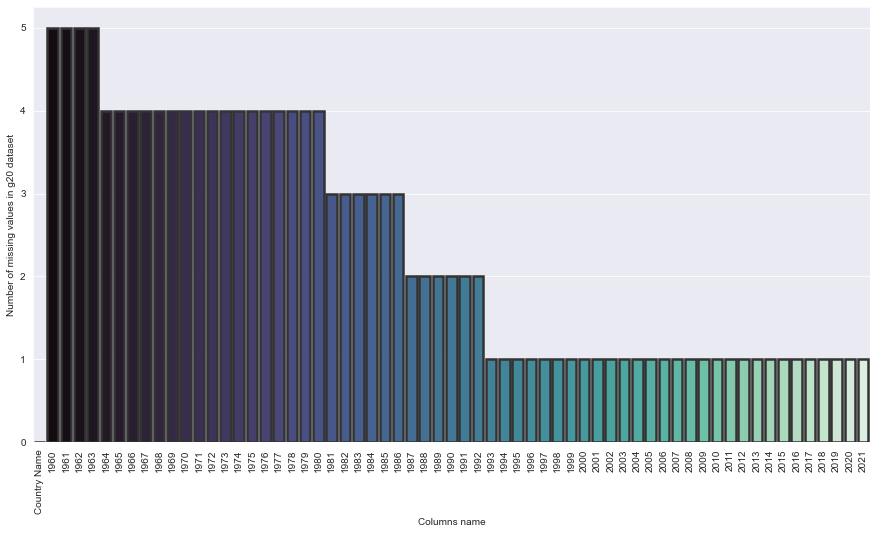

In [10]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90)
sns.barplot(x=g20.columns, y=g20.isna().sum(),linewidth=2.5, edgecolor=".2",palette='mako')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in g20 dataset")
plt.show()

#### How many countries have missing values?Which ones?

In [11]:
print("The amount of countries that have null values are: ",g20.isnull().any(axis = 1).sum())

The amount of countries that have null values are:  5


In [12]:
g20[g20.isna().any(axis=1)]

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
9,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.403499,6.204311,6.329040,9.029901,8.739144,3.446373,3.664850,3.732976,3.211768,8.301660
40,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.619524,2.621050,1.921642,1.437024,2.000002,1.593136,2.074790,2.899234,2.419422,0.981015
202,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.074743,6.753710,7.823412,15.534405,7.042448,3.683329,2.878297,4.470367,3.381659,6.694459
205,Saudi Arabia,NaN,NaN,NaN,NaN,2.8,0.389105,1.550388,2.099237,1.588785,...,2.866269,3.532525,2.236290,1.206073,2.068840,-0.838195,2.458142,-2.093333,3.445458,3.063290


As we can see the countries that have null values are: Argentina, Brazil (the South America Countries that are part of the G20), China and Russian Federation(that are the world opposition to the United States) and Saudi Arabia.
Now we are going to see how many null values have.

# Transpose the Dataset and Reindex

In [13]:
def g20_null(num):
    null=g20.loc[[num]].isna().sum().sum()
    name= g20.loc[num,'Country Name']
    
    return  name, null

In [14]:
print(g20_null(9)[0],"has got",g20_null(9)[1],".This means that has all missing values.")
print(g20_null(29)[0],"has got",g20_null(29)[1], "missing values.")
print(g20_null(40)[0],"has got",g20_null(40)[1], "missing values.")
print(g20_null(202)[0],"has got",g20_null(202)[1],"missing values.")
print(g20_null(205)[0],"has got",g20_null(205)[1], "missing values.")

Argentina has got 62 .This means that has all missing values.
Brazil has got 21 missing values.
China has got 27 missing values.
Russian Federation has got 33 missing values.
Saudi Arabia has got 4 missing values.


Since Argentina has no data, we will be removing it as it makes no sense to have it.

In [15]:
transp= g20.T
transp.columns = transp. iloc[0]

transp=transp.drop(index='Country Name')
transp.reset_index(inplace=True)
transp=transp.rename(columns = {'index':'Year'})
transp.drop(['Argentina'], inplace=True, axis=1)
transp

Country Name,Year,Australia,Brazil,Canada,China,Germany,France,United Kingdom,Indonesia,India,Italy,Japan,"Korea, Rep.",Mexico,Russian Federation,Saudi Arabia,Turkiye,United States,South Africa
0,1960,3.72881,NaN,1.3587,NaN,1.53661,4.13994,1.00358,39.5904,1.77988,2.35016,3.57451,7.96557,4.92752,NaN,NaN,5.66474,1.45798,1.28886
1,1961,2.28758,NaN,1.01877,NaN,2.29368,2.40046,3.4475,13.6919,1.69521,2.0507,5.36846,8.19565,1.60876,NaN,NaN,3.17286,1.07072,2.10237
2,1962,-0.319489,NaN,1.06157,NaN,2.84328,5.33128,4.1965,131.398,3.63221,4.69114,6.83544,6.61831,1.19898,NaN,NaN,3.88832,1.19877,1.24629
3,1963,0.641026,NaN,1.62815,NaN,2.96696,4.99915,2.01854,145.911,2.94616,7.45472,6.70691,20.6916,0.594055,NaN,NaN,6.36271,1.23967,1.33797
4,1964,2.86624,NaN,1.91214,NaN,2.33573,3.21119,3.28159,108.995,13.3553,5.91232,3.80039,29.4628,2.3379,NaN,2.8,1.11964,1.27891,2.53497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,1.94865,3.44637,1.59688,1.59314,1.5095,1.03228,2.55776,3.8088,3.32817,1.22653,0.4842,1.94433,6.04146,3.68333,-0.838195,11.1443,2.13011,5.18425
58,2018,1.9114,3.66485,2.26823,2.07479,1.73217,1.85082,2.29284,3.19835,3.93883,1.13749,0.989095,1.47584,4.89935,2.8783,2.45814,16.3325,2.44258,4.51717
59,2019,1.61077,3.73298,1.94927,2.89923,1.44567,1.10825,1.7381,3.03059,3.72951,0.611247,0.468776,0.383,3.63596,4.47037,-2.09333,15.1768,1.81221,4.12025
60,2020,0.846906,3.21177,0.717,2.41942,0.50669,0.476499,0.989487,1.92097,6.62344,-0.137708,-0.0249958,0.537288,3.39683,3.38166,3.44546,12.279,1.23358,3.21004


In [16]:
columns= transp.columns[1:]
columns

Index(['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'France',
       'United Kingdom', 'Indonesia', 'India', 'Italy', 'Japan', 'Korea, Rep.',
       'Mexico', 'Russian Federation', 'Saudi Arabia', 'Turkiye',
       'United States', 'South Africa'],
      dtype='object', name='Country Name')

# List of G20 Countries 

DataError: No numeric types to aggregate

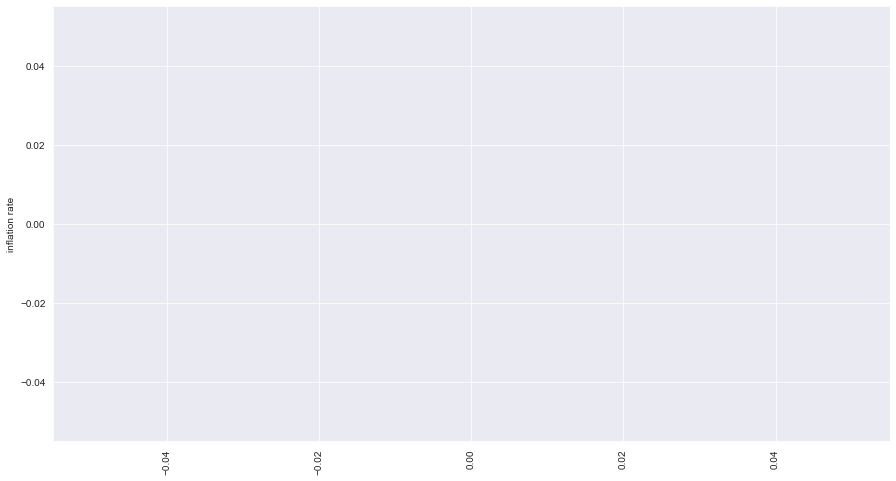

In [17]:
plt.rcParams['figure.figsize']=15,8
plt.ylabel("inflation rate")
plt.xticks(rotation=90)

for country in columns:
    sns.lineplot(data=transp,x='Year',y=country)
    
plt.legend(columns)
    
    
plt.show()

This LinePlot tells us that Brazil had got the highest amount of inflation,Indonesia and Russian Federation follows.Next,
We are going to plot the countries individually to see their Inflation rate.

DataError: No numeric types to aggregate

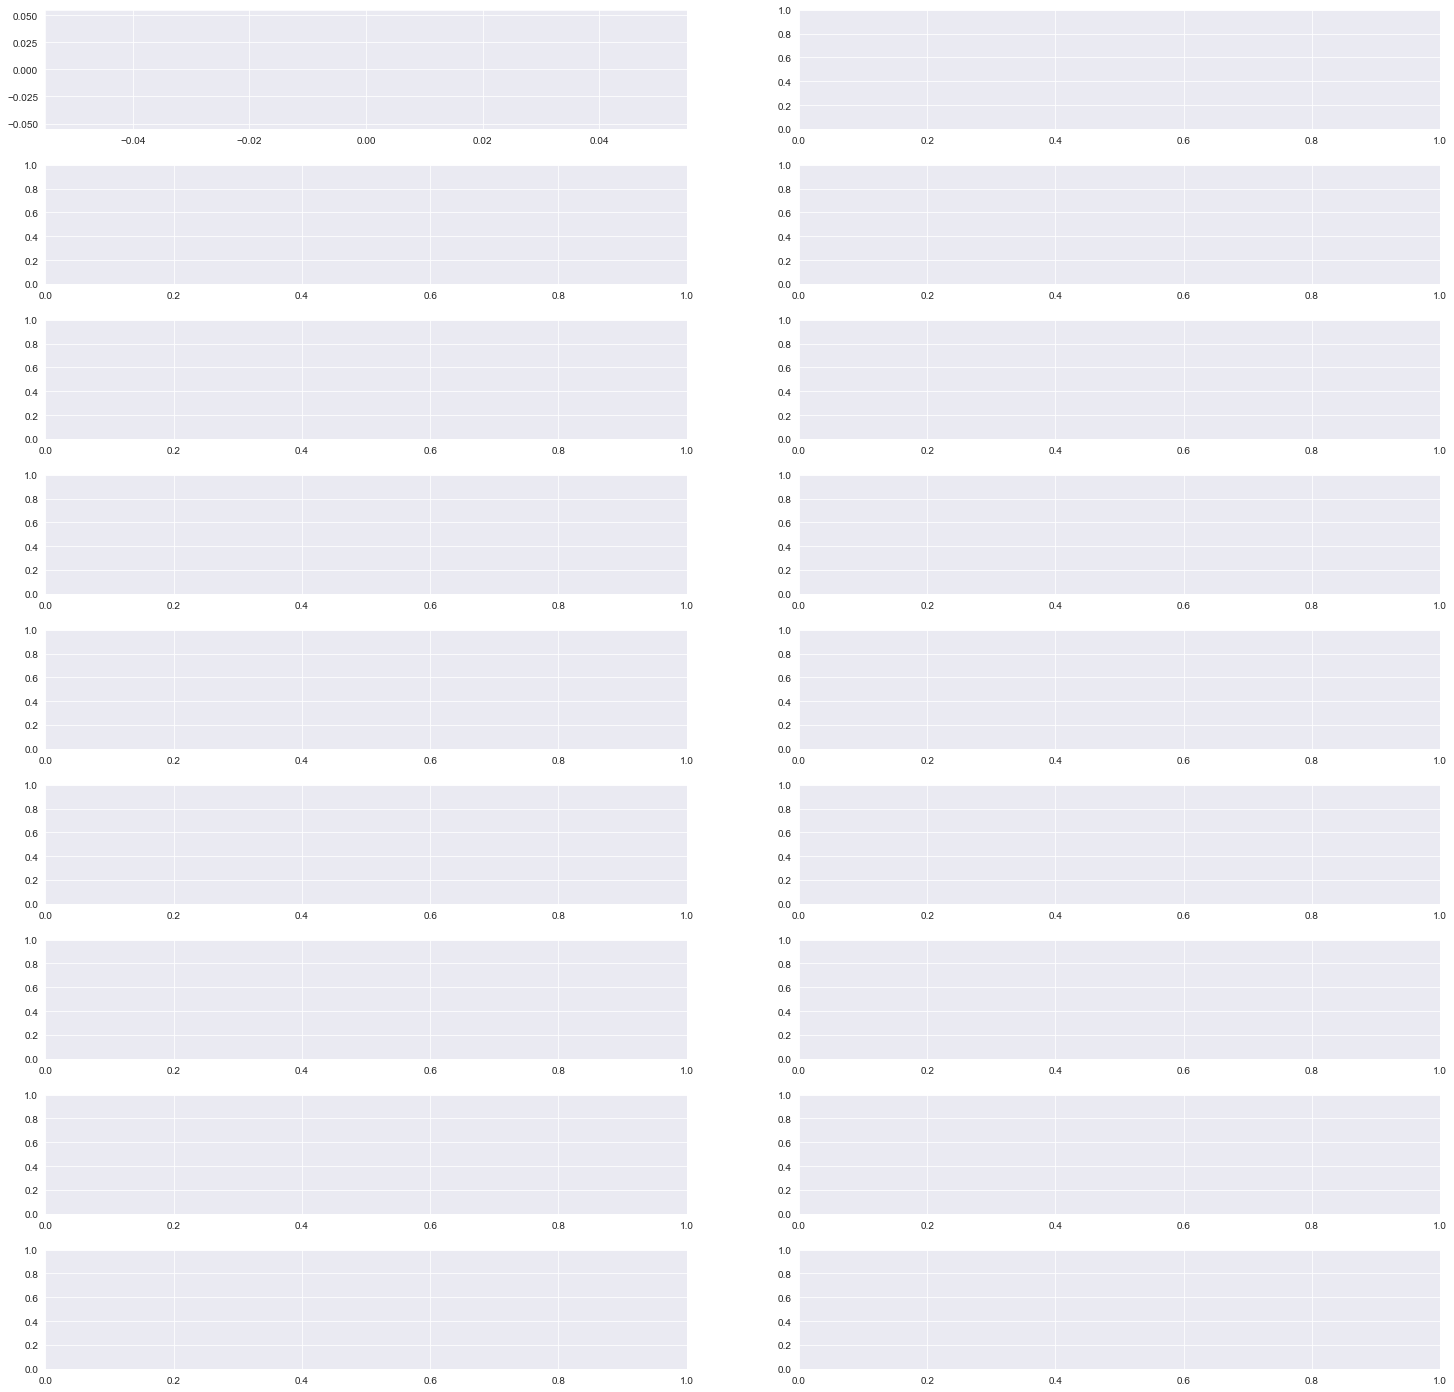

In [18]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(9,2, figsize=(25,25))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat,columns):
    
    sns.lineplot(data=transp,x='Year',y=col,color='Blue',ax=ax)
    ax.set_title(col,fontweight="bold")
    ax.set_xticklabels(transp['Year'].tolist(),rotation=90)
    
fig.tight_layout()
fig.show()

## Bar plot

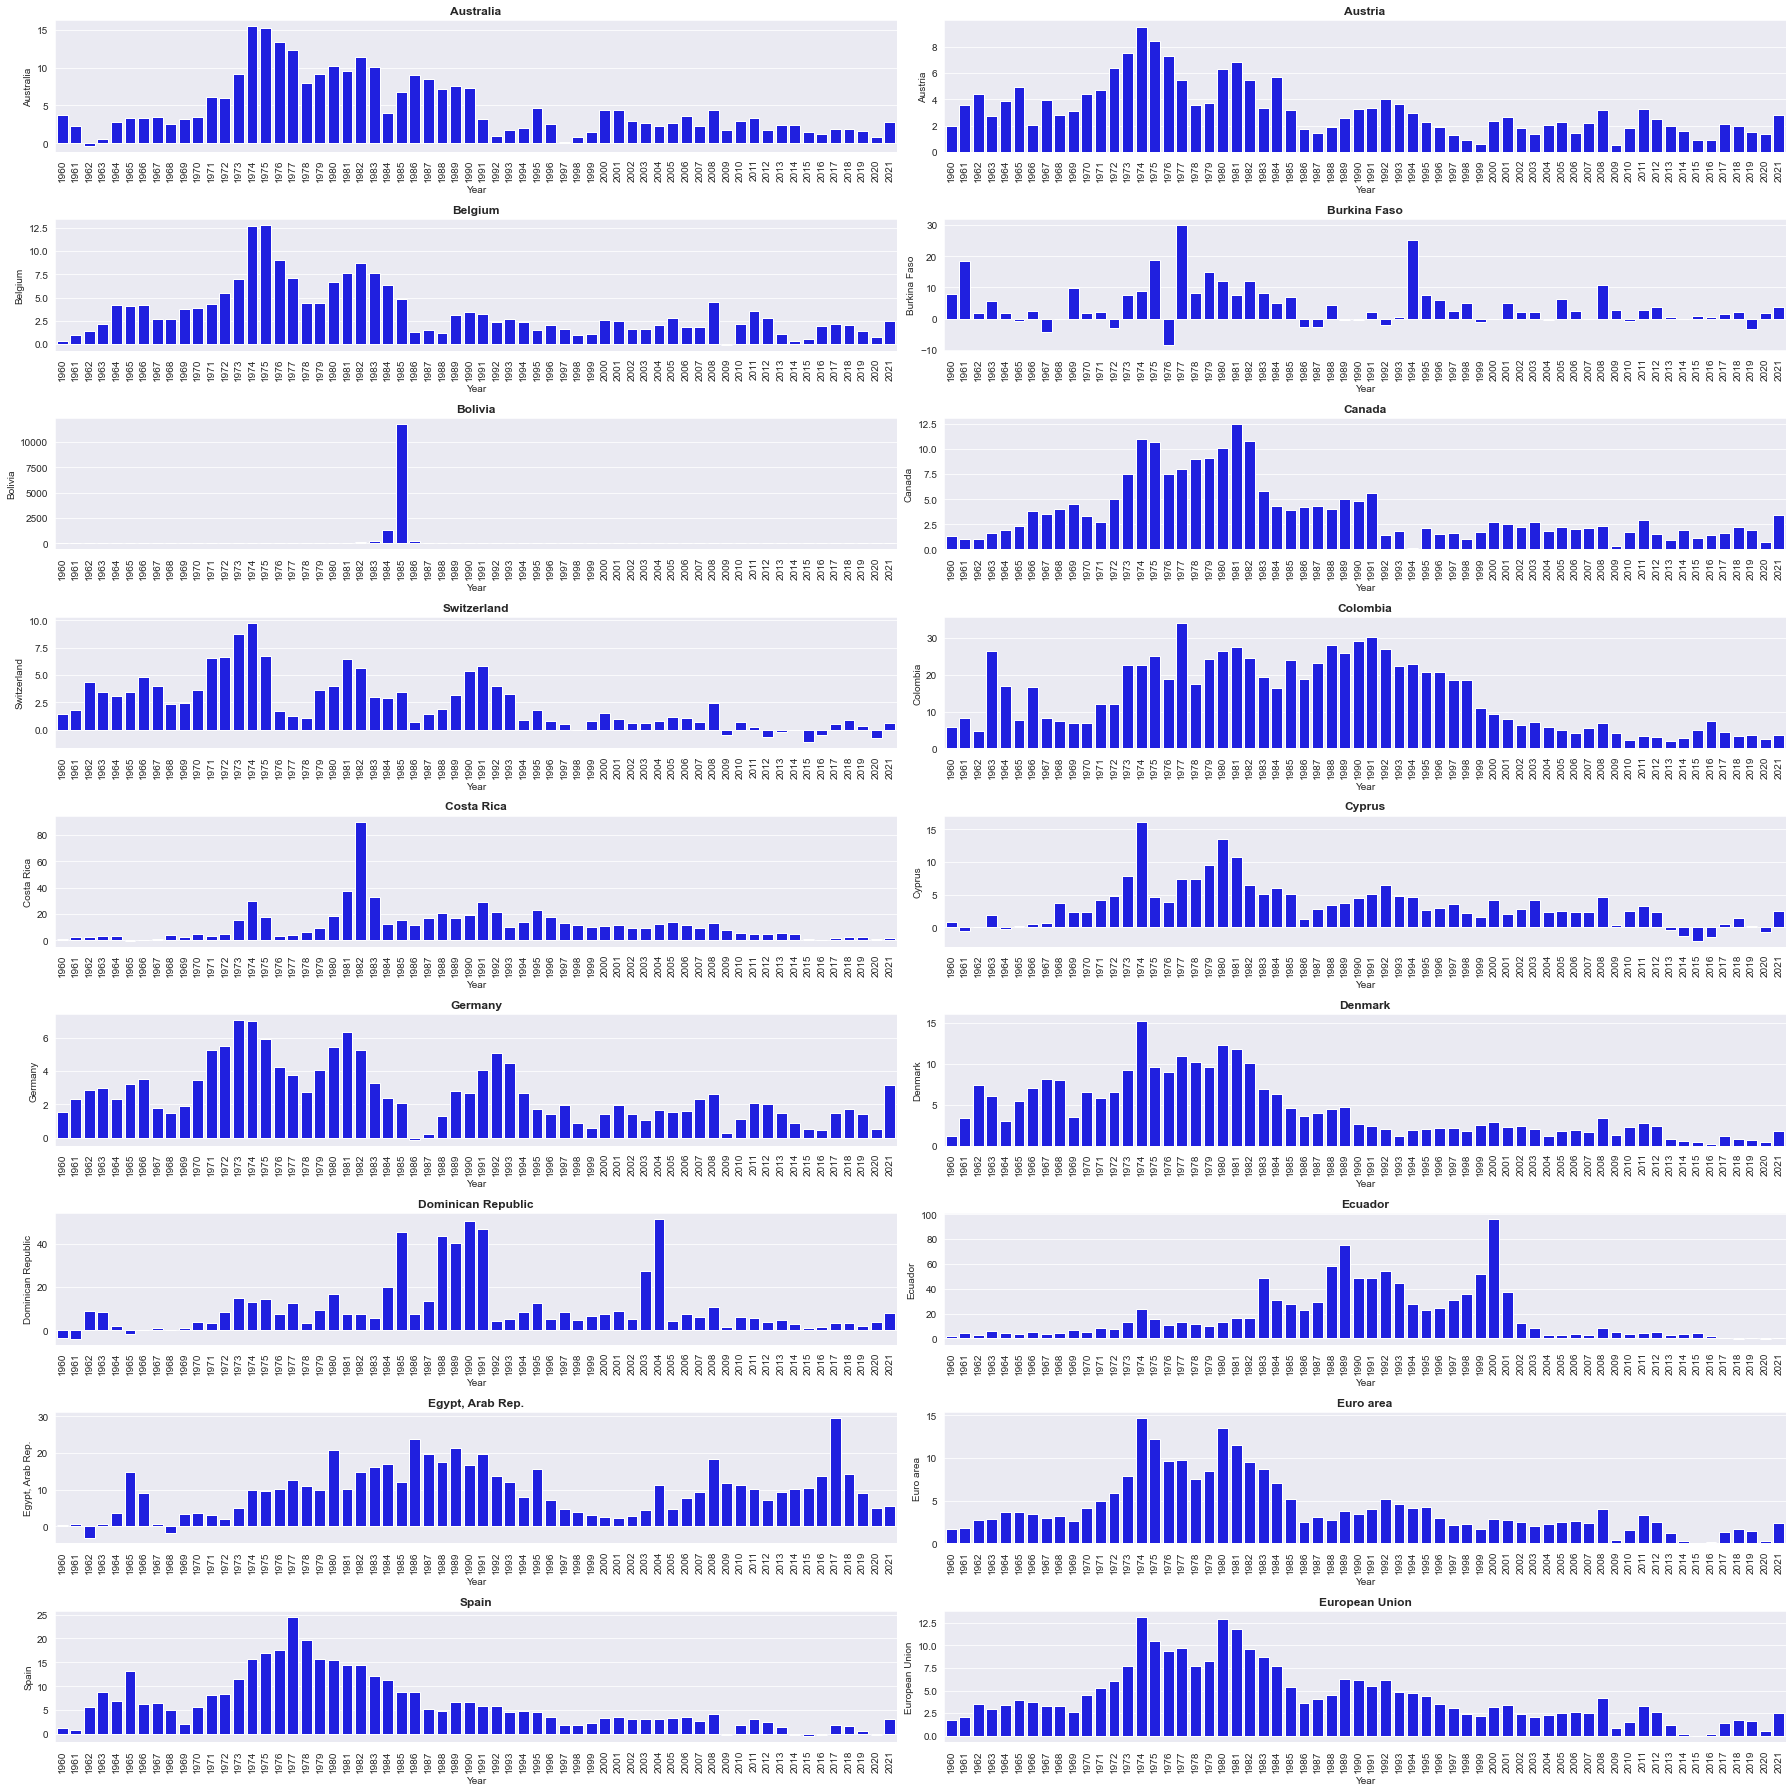

In [31]:
fig, axes = plt.subplots(9,2, figsize=(25,25))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat,columns):
    sns.barplot(data=transp,x='Year',y=col,color='Blue',ax=ax)
    ax.set_title(col,fontweight="bold")
    ax.set_xticklabels(transp['Year'],rotation=90)
    
fig.tight_layout()
fig.show()

Now we are going to compare side to side the countries with the most Inflation rates.Brazil, Indonesia and Russian Federation.

In [32]:
three= ['Brazil','Indonesia','Russian Federation']

ValueError: Could not interpret input 'Brazil'

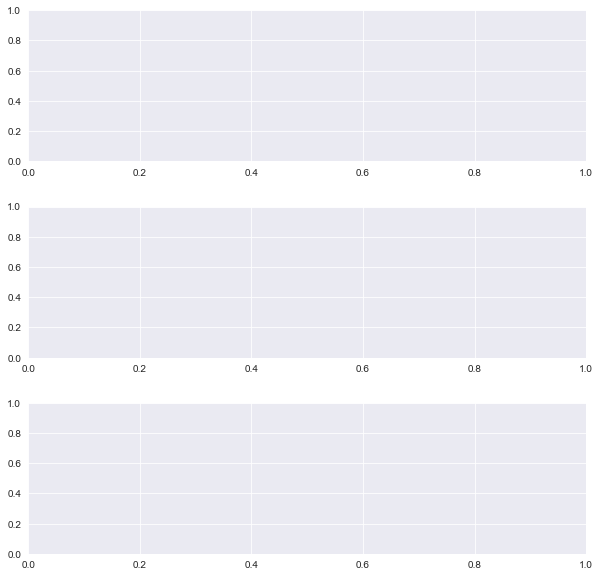

In [33]:
fig, axes = plt.subplots(3,1, figsize=(10,10))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat,three):
    sns.lineplot(data=transp,x='Year',y=col,color='Green',linewidth=2.5,marker="o",ax=ax)
    sns.barplot(data=transp,x='Year',y=col,color='Orange',ax=ax)
    ax.set_title(col,fontweight="bold")
    ax.set_xticklabels(transp['Year'],rotation=90)
    
fig.tight_layout()
fig.show()

Here we can see that brazil has an Long-lasting episodes of high inflation beginning in the 1990s, Indonesia has an Long-lasting episodes of high inflation beginning in 1960s and Russia has an Long-lasting episodes of high inflation after the Fall of the Soviet Union.

Next we can see some countries have their inflation rate increased in the last years like United States, Germany, Canada,Turkiye. This is what is call Pandemic Inflation Rate.

In [ ]:
four=['United States','Germany','Canada','Turkiye']

In [ ]:
fig, axes = plt.subplots(4,1, figsize=(10,10))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat,four):
    sns.lineplot(data=transp,x='Year',y=col,color='Green',linewidth=2.5,marker="o",ax=ax)
    sns.barplot(data=transp,x='Year',y=col,color='Orange',ax=ax)
    ax.set_title(col,fontweight="bold")
    ax.set_xticklabels(transp['Year'],rotation=90)
    
fig.tight_layout()
fig.show()

As we can see United States, Germany and Canada have got the highest inflation rate since 90s and Turkiye has got the highest since 2003 .

In [ ]:
inflation_df['Year'] = inflation_df['Year'].astype('int32')
inflation_df.info()

In [ ]:
#From the highest Inflation Rate since 1960
inflation_df[inflation_df['Year']>=1960].groupby('Country Name').mean().nlargest(10, 'Rate')

In [ ]:
#From the lowest Inflation Rate since 1960
inflation_df[inflation_df['Year']>=1960].groupby('Country Name').mean().nsmallest(10, 'Rate')

In [ ]:
def plot_country(inflation_df:pd.DataFrame, country:str):
    sns.set_style("white")
    data = inflation_df[inflation_df["Country Name"] == country]
    fig, ax = plt.subplots(1,1,figsize=(15,4))
    ax.plot(data.Year, data.Rate, color = "slategrey", marker="o", linewidth=2)
    ax.fill_between(data.Year, 0, data.Rate, alpha=0.2, color='g', where=(data.Rate >= 0))
    ax.fill_between(data.Year, 0, data.Rate, alpha=0.2, color='r', where=(data.Rate < 0))
    ax.set_xticks(data.Year)
    ax.set_xticklabels(data.Year, rotation=90)
    ax.set_title("Inflation evolution in "+country, loc="left", fontsize=20)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Inflation in %", fontsize=14)
    sns.despine()

In [ ]:
for country in ["Spain", "France", "Italy", "Germany", 'Venezuela, RB', "Malaysia", 'Singapore']:
    plot_country(inflation_df, country)

In [ ]:
def compare_countries(inflation_df:pd.DataFrame, countries:list):
    if len(countries) > 2:
        raise ValueError('More than two countries passed')
    sns.set_style("white")
    data = inflation_df[inflation_df["Country Name"].isin(countries)]
    fig, ax = plt.subplots(1,1,figsize=(15,4))
    sns.lineplot(x='Year', y='Rate', hue='Country Name', data=data, ax=ax, marker="o", linewidth=2, markersize=8)
    ax.set_xticks(data.Year)
    ax.set_xticklabels(data.Year, rotation=90)
    ax.set_title(f"Inflation comparison between {countries[0]} and {countries[1]}", loc="left", fontsize=20)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Inflation in %", fontsize=14)
    sns.despine()

In [ ]:
compare_countries(inflation_df, ['Spain', 'France'])

In [ ]:
compare_countries(inflation_df, ['Malaysia', 'Singapore'])

### Heatmap

In [ ]:
def countriesCorr(inflation_df, countries):
    table = inflation_df.pivot(index='Year', columns='Country Name', values='Rate')[countries]
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(table.corr(), cmap="YlGnBu", annot=True, linewidths=1, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title("Country inflation correlation", fontsize=18)
    plt.show()

countries = ['Spain', 'France', 'Germany', 'Italy', 'Norway', 'Portugal', 'Poland', 'Romania', 'Denmark', 'United Kingdom']
countriesCorr(inflation_df, countries)

In [ ]:
new_data = df.dropna(axis = 0) 
new_data

In [ ]:
print("The amount of countries that have null values are: ",new_data.isnull().any(axis = 1).sum())

In [ ]:
def new_data_null(num):
    null=new_data.loc[[num]].isna().sum().sum()
    name= new_data.loc[num,'Country Name']
    
    return  name, null

In [ ]:
transp= new_data.T
transp.columns = transp. iloc[0]

transp=transp.drop(index='Country Name')
transp.reset_index(inplace=True)
transp=transp.rename(columns = {'index':'Year'})
transp

In [ ]:
columns= transp.columns[1:]
columns

### Non Colonized Country

In [29]:
non_country = df.loc[df['Country Name'].isin([ "Austria", "Belgium",  "Switzerland", "Cyprus", "Denmark", "Dominican Republic", "Finland", "France", "United Kingdom", "Spain", "Greece","Ireland", "Iceland", "Japan", "Luxembourg", "Mexico", "Malta", "Netherlands", "Norway", "Portugal", "Sweden", "Thailand", "Turkiye"  ])].copy()
non_country

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
14,Austria,1.945749,3.542240,4.381799,2.708767,3.868564,4.930916,2.054821,3.974673,2.764864,...,2.485676,2.000156,1.605812,0.896563,0.891592,2.081269,1.998380,1.530896,1.381911,2.766667
17,Belgium,0.299467,0.992676,1.404607,2.148003,4.168761,4.065201,4.174348,2.730303,2.701450,...,2.839663,1.113096,0.340003,0.561429,1.973853,2.125971,2.053165,1.436820,0.740792,2.440249
37,Switzerland,1.438795,1.845398,4.315993,3.440213,3.080557,3.414479,4.775980,4.005196,2.395822,...,-0.692552,-0.217323,-0.013203,-1.143909,-0.434619,0.533788,0.936335,0.362886,-0.725875,0.581814
53,Cyprus,0.827301,-0.615385,0.103199,1.958763,-0.303337,0.202840,0.506073,0.704935,3.766667,...,2.389054,-0.399358,-1.354989,-2.096998,-1.429167,0.531766,1.435491,0.250371,-0.638423,2.446089
58,Denmark,1.255230,3.451629,7.377820,6.105033,3.092784,5.450000,7.064960,8.207854,8.005207,...,2.397915,0.789072,0.564021,0.452034,0.250000,1.147132,0.813609,0.758132,0.420712,1.853045
59,Dominican Republic,-3.562192,-3.900000,9.157128,8.579600,2.107112,-1.891660,0.262927,1.238345,0.035976,...,3.694497,4.830951,2.998642,0.836746,1.614166,3.279557,3.564434,1.810604,3.781032,8.243003
70,Spain,1.177771,0.809253,5.706477,8.743698,6.979247,13.214138,6.240367,6.391631,4.954366,...,2.446128,1.408581,-0.151115,-0.500366,-0.202598,1.956076,1.674981,0.699519,-0.322753,3.093135
75,Finland,3.418127,1.691002,4.383983,4.996382,10.275861,4.940588,3.873654,5.377782,9.191668,...,2.808336,1.478286,1.041196,-0.207929,0.356685,0.754015,1.083821,1.024094,0.290555,2.194574
77,France,4.139936,2.400461,5.331280,4.999153,3.211192,2.703105,2.602001,2.791777,4.543205,...,1.954195,0.863715,0.507759,0.037514,0.183335,1.032283,1.850815,1.108255,0.476499,1.642331
81,United Kingdom,1.003576,3.447496,4.196499,2.018544,3.281587,4.773775,3.909618,2.482116,4.697428,...,2.573235,2.291667,1.451120,0.368047,1.008417,2.557756,2.292840,1.738105,0.989487,2.518371


### Colonized Country

In [ ]:
Been Conolized: Burkina Faso(French), Bolivia(Spanish), Colombia(Spanish), Costa Rica(Spain), Germany(Britain, Holland, France and Spain), Ecuador(Spain), Egypt, Arab Rep.(French, British), Guatemala(Spain), Honduras(Spain), Haiti(Span), Indonesia(Dutch), India(Europe), Israel(British), Italy(British,Spain Russia and Spain), Jamaica(British), Kenya(British),
Korea, Rep.(japan), Latin America & Caribbean(Spain, France, Protugal), Sri Lanka(Portugal, the Netherlands and Great Britain), Morocco(France and Spain), Malaysia(Portuguese, Dutch, British), North America(Britain, France, Spain, and the Netherlands), Nigeria(British), New Zealand(British), Pakistan(British), Panama(Spanish), Peru(Spanish),Philippines(Spanish), Paraguay(Spanish), Sudan(British), El Salvador(Spanish), Uruguay(Europeans), South Africa (Netherlands and british)

In [30]:
colo_country = df.loc[df['Country Name'].isin(["Australia","Burkina Faso", "Bolivia", "Canada","Colombia", "Costa Rica", "Germany", "Ecuador", "Egypt, Arab Rep.", "Dominican Republic", "Honduras", "Haiti", "Indonesia", "India", "Israel","Italy", "Jamaica", "Kenya", "Korea, Rep.", "Latin America & Caribbean", "Sri Lanka", "Morocco", "Malaysia", "North America", "Nigeria", "New Zealand", "Pakistan", "Panama", "Peru", "Philippines", "Paraguay", "Sudan", "El Salvador", "Uruguay", "South Afric", "United States"  ])].copy()
colo_country

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
13,Australia,3.728814,2.287582,-0.319489,0.641026,2.866242,3.405573,3.293413,3.478261,2.521008,...,1.762780,2.449889,2.487923,1.508367,1.276991,1.948647,1.911401,1.610768,0.846906,2.863910
19,Burkina Faso,7.788162,18.562139,1.675910,5.574203,1.845123,-0.730253,2.364106,-4.333754,-0.286714,...,3.818152,0.533739,-0.258090,0.724839,0.441041,1.482999,1.955943,-3.233389,1.884701,3.653268
28,Bolivia,11.533153,7.561493,5.879331,-0.706357,10.181818,2.860286,6.951872,11.200000,5.470624,...,4.515603,5.736400,5.766601,4.059610,3.623214,2.822758,2.272060,1.839545,0.940742,0.737384
35,Canada,1.358696,1.018767,1.061571,1.628151,1.912145,2.332657,3.815659,3.579952,4.055300,...,1.515678,0.938292,1.906636,1.125241,1.428760,1.596884,2.268226,1.949269,0.717000,3.395193
45,Colombia,5.814076,8.283190,4.697094,26.355436,17.072435,7.590684,16.728168,8.328191,7.447539,...,3.167326,2.018098,2.897819,4.990234,7.514293,4.312141,3.240234,3.525493,2.524621,3.495146
48,Costa Rica,0.790206,2.430794,2.677860,2.931618,3.324033,-0.665000,0.182883,1.208340,4.093891,...,4.495453,5.231336,4.519201,0.801982,-0.017479,1.625907,2.221115,2.096046,0.724911,1.726478
55,Germany,1.536612,2.293676,2.843280,2.966961,2.335728,3.242329,3.533059,1.796046,1.470304,...,2.008491,1.504721,0.906798,0.514421,0.491749,1.509497,1.732168,1.445667,0.506690,3.142970
59,Dominican Republic,-3.562192,-3.900000,9.157128,8.579600,2.107112,-1.891660,0.262927,1.238345,0.035976,...,3.694497,4.830951,2.998642,0.836746,1.614166,3.279557,3.564434,1.810604,3.781032,8.243003
66,Ecuador,1.676599,3.985621,2.870885,5.939509,4.034205,3.069071,5.453727,3.818138,4.317656,...,5.101722,2.721776,3.589220,3.966646,1.728265,0.417336,-0.224103,0.266013,-0.338872,0.133251
67,"Egypt, Arab Rep.",0.332829,0.693607,-3.003077,0.746646,3.660983,14.839004,9.036441,0.701897,-1.675759,...,7.111729,9.469720,10.070215,10.370490,13.813606,29.506608,14.401466,9.152800,5.044933,5.545744


DataError: No numeric types to aggregate

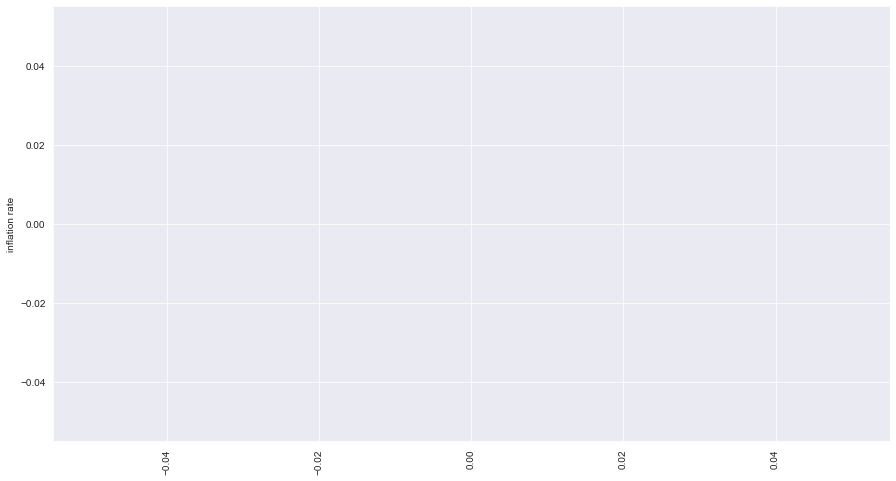

In [25]:
plt.rcParams['figure.figsize']=15,8
plt.ylabel("inflation rate")
plt.xticks(rotation=90)

for country in columns:
    sns.lineplot(data=transp,x='Year',y=country)
    
plt.legend(columns)
    
    
plt.show()

In [ ]:
fig, axes = plt.subplots(9,2, figsize=(25,25))
fig.subplots_adjust(hspace=.3, wspace=.175)
for ax, col in zip(axes.flat,columns):
    sns.barplot(data=transp,x='Year',y=col,color='Blue',ax=ax)
    ax.set_title(col,fontweight="bold")
    ax.set_xticklabels(transp['Year'],rotation=90)
    
fig.tight_layout()
fig.show()

In [26]:
transp['Bolivia'].isnull().sum()

0